# Découverte de Miniban Explorer

L'objectif de cette feuille de travail est d'apprendre les bases du contrôle de Miniban Explorer

In [1]:
import robot_header

## Initialisation du robot

Le code suivant initialise le robot. Cela consiste à se connecter aux différents composants du robot, et à vérifier s'ils fonctionnent. Exécute-le.  
(à noter que la cellule n'est pas modifiable)

In [2]:
import robot
bot = robot.Robot()

- connexion aux moteurs ... [ok]
- connexion à la caméra ... [ok]
- calibration de l'imu ... [ok]
- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 24.0° 	volt: 10.40V  	[ok]
    [arrière gauche] 	temp: 25.0° 	volt: 10.10V  	[ok]
    [avant droit] 	temp: 24.0° 	volt: 10.10V  	[ok]
    [arrière droit] 	temp: 23.0° 	volt: 10.10V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [dist. droite] ... [ok]
    [dist. gauche] ... [ok]
    [camera] ... [ok]
- procédure de test globale ... [ok]


*Attention, tu ne peux pas éxécuter plusieurs fois le code précédent. Si tu veux le ré-exécuter, il faut relancer le noyau. Pour ce faire, clique sur le menu "Noyau/Redémarrer", ensuite, il faut recommencer la feuille.*  
  

Examinons la sortie du code précédent. D'abord, on se connecte aux moteurs des roues et à la caméra. Ensuite s'exécute la procédure de test pour voir si tous les composants fonctionnent bien.
- les premiers tests concernent les moteurs des roues. On vérifie leur température. Un moteur qui chauffe, ça n'est jamais trop bon. Cette température ne doit pas excéder 55°. Ensuite, on vérifie leur alimentation en électricité, on appelle ça la tension électrique, elle est mesurée en Volt. Elle doit être un peu au dessus de 10V.
- après cela, on vérifie les capteurs. Et en premier les capteurs de distance, à l'avant, à droite et à gauche. Le test des capteurs est limité, on vérifie seulement que l'on a des valeurs.
- enfin, on vérifie que la caméra est bien connectée.

A tout moment, tu peux relancer la procédure de test avec la commande suivante que tu peux tester.

In [67]:
bot.check()

- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 42.0° 	volt: 10.10V  	[ok]
    [arrière gauche] 	temp: 43.0° 	volt: 10.10V  	[ok]
    [avant droit] 	temp: 41.0° 	volt: 10.10V  	[ok]
    [arrière droit] 	temp: 41.0° 	volt: 10.00V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [dist. droite] ... [ok]
    [dist. gauche] ... [ok]
    [camera] ... [ok]
- procédure de test globale ... [ok]


Tu peux aussi conduire certains tests de façon indépendante. Par exemple vérifier la température des moteurs:

In [68]:
bot.motor_temperature()

(42.0, 43.0, 41.0, 41.0)

ou encore leur tension d'alimentation:

In [69]:
bot.motor_voltage()

(10.100000000000001, 10.100000000000001, 10.100000000000001, 10.0)

## Capteurs de distance

In [3]:
bot.distance('avant')

6.751433327168485

In [4]:
bot.distance('gauche')

64.35316946959897

In [5]:
bot.distance('droite')

17.23317865429234

In [114]:
bot.distance()

{'avant': 15.138552130239004,
 'droite': 52.76766595289081,
 'gauche': 7.81532456861134}

In [6]:
N = 100
sum = 0.0
for i in range(N):
    sum += bot.distance('avant')
moyenne = sum / N
print ('moyenne de distance : %0.1fcm' % moyenne)

moyenne de distance : 6.8cm


Dans la cellule suivante, on effectue beaucoup de mesure avec le capteur de distance avant (1000 !). Ca prend un peu de temps. Ensuite, on produit un graphique qui représente la répartition de ces mesures. Vous pourrez voir que les mesures varient un peu, on appelle ça le bruit.

Moyenne: 6.94 cm
Ecart type: 0.03


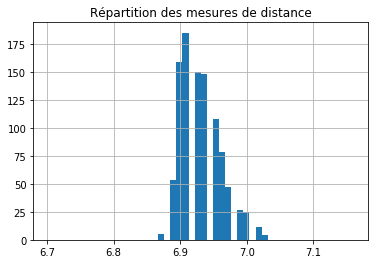

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

# Collecte des mesures
nb = 1000
measures = []
for i in range(nb):
    measures.append(bot.distance('avant'))

# Calcul de la moyenne et l'écart-type
npa = np.array(measures)
mean = np.mean(npa)
dev = np.std(npa)
print("Moyenne: %0.2f cm" % mean)
print("Ecart type: %0.2f" % dev)

# Calcul du diagramme en bâtons
int_size = 15*dev
X_max = mean + int_size/2
X_min = mean - int_size/2
N = 50
X = []
for n in range(0,N): X.append(X_min + n*(X_max-X_min)/N)
H = [0]*N
for n in range(0,N-1):
    for m in measures:
        if X[n] <= m and m < X[n+1]: 
            H[n] += 1

# Affichage du graphique
plt.bar(X, H, (X_max-X_min)/N)
plt.grid()
plt.title('Répartition des mesures de distance')
plt.show()

# Orientation

In [52]:
bot.imu.calib()
bot.imu.reset_orientation()

In [11]:
bot.imu.get_orientation()

1.80290782107852

## Déplacements

In [6]:
bot.avance(3.0,1)

In [17]:
d1 = bot.distance('avant')
bot.avance(-5.0, 2)
d2 = bot.distance('avant')
print ("déplacement : %0.1fcm" % (d1-d2))

déplacement : 15.4cm


Avancer jusqu'à être à 10cm du mur

In [14]:
bot.stop()

In [70]:
import time
import chrono
chr = chrono.Chrono()
vitesse = 5.0
dists = []
temps = []
while True:
    bot.avance(vitesse)
    d = bot.distance('avant')
    dists.append(d)
    temps.append(chr.elapsed())
    if d < 5.0: break
    time.sleep(0.05)
bot.stop()

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

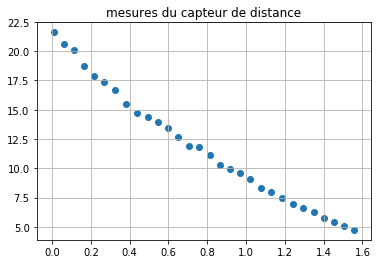

In [72]:
plt.grid()
plt.scatter(temps, dists)
plt.title('mesures du capteur de distance')
plt.show()

In [16]:
X = np.array(temps)
Y = np.array(dists)
a,b = np.polyfit(X,Y,1)
print ('On obtient comme approximation la droite y = %0.2f x + %0.2f' % (a,b))
print ('cela veut dire que le robot s\'est déplacé à %0.2f cm/s' % a)
print ('rapport (vitesse réelle) / (vitesse théorique) : %0.1f%%' % abs(100*a/vitesse))

On obtient comme approximation la droite y = -4.92 x + 18.69
cela veut dire que le robot s'est déplacé à -4.92 cm/s
rapport (vitesse réelle) / (vitesse théorique) : 98.3%


In [59]:
bot.imu.calib(5)

In [85]:
import time
tgt = -45.0
theta0 = bot.imu.get_orientation()
while True:
    delta_theta = bot.imu.get_orientation() - theta0
    erreur = tgt - delta_theta
    v = -0.2 * erreur
    sign = 1 if v > 0 else -1
    v_abs = abs(v)
    if v_abs < 2: v_abs = 2
    if abs(erreur) > 5 or v_abs > 10: v_abs = 10
    v = sign * v_abs
    bot.pivote(v)
    if abs(erreur) < 1.0: break
    time.sleep(0.01)
bot.stop()
time.sleep(0.250)
print(bot.imu.get_orientation()-theta0)

-44.00198551209405


## Camera

- Enregistrement de l'image dans image.jpg


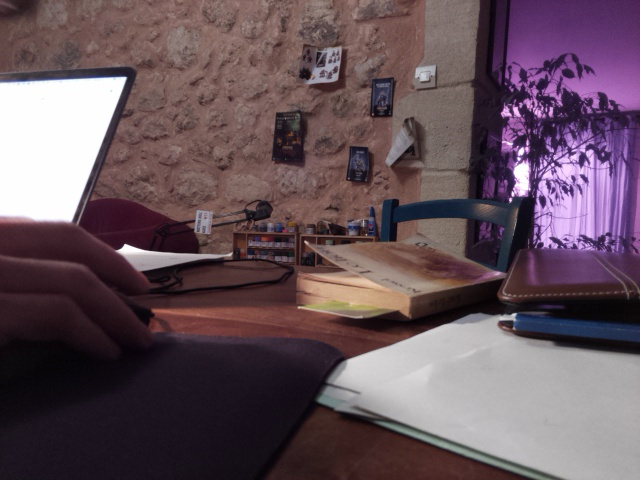

In [79]:
bot.photo()
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "image.jpg")